In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.preprocessing import scale
from sklearn.cluster import KMeans

%matplotlib.inline
plt.style.use('seaborn-white')

UsageError: Line magic function `%matplotlib.inline` not found.


In [2]:
#Generate Data
np.random.seed(2)
X = np.random.standard_normal((50,2))

In [3]:
X1 = X
X[:25,0] = X[:25,0]+3
X[:25,1] = X[:25,1]-4

In [4]:
print(X1)
print(X[:25,0]+3)
print(X[:25,1]-4)

[[ 2.58324215 -4.05626683]
 [ 0.8638039  -2.35972919]
 [ 1.20656441 -4.84174737]
 [ 3.50288142 -5.24528809]
 [ 1.94204778 -4.90900761]
 [ 3.55145404 -1.70779199]
 [ 3.04153939 -5.11792545]
 [ 3.53905832 -4.5961597 ]
 [ 2.9808695  -2.82499878]
 [ 2.25212905 -3.99097475]
 [ 2.12189211 -4.15643417]
 [ 3.25657045 -4.98877905]
 [ 2.66117803 -4.23618403]
 [ 2.36234499 -5.18761229]
 [ 1.57878277 -4.1534952 ]
 [ 2.73094304 -1.76863321]
 [ 0.56523242 -3.8872735 ]
 [ 3.37044454 -2.64036614]
 [ 3.50185721 -4.8442137 ]
 [ 3.00000976 -3.45764743]
 [ 2.6864918  -3.22898826]
 [ 1.13190935 -2.26881533]
 [ 4.46767801 -4.33567734]
 [ 3.61134078 -3.95202941]
 [ 2.17086471 -3.91228978]
 [ 1.00036589 -0.38109252]
 [-0.37566942 -0.07447076]
 [ 0.43349633  1.27837923]
 [-0.63467931  0.50839624]
 [ 0.21611601 -1.85861239]
 [-0.41931648 -0.1323289 ]
 [-0.03957024  0.32600343]
 [-2.04032305  0.04625552]
 [-0.67767558 -1.43943903]
 [ 0.52429643  0.73527958]
 [-0.65325027  0.84245628]
 [-0.38151648  0.06648901]
 

In [20]:
km1 = KMeans(n_clusters=3, n_init = 20)
km1.fit(X)

pd.Series(km1.labels_).value_counts()


1    21
0    20
2     9
dtype: int64

In [8]:
km1.cluster_centers_

array([[-0.23940153,  0.14703307],
       [ 2.53287159, -3.80815122]])

In [21]:
np.random.seed(4)
km2 = KMeans(n_clusters = 4 , n_init = 20)
km2.fit(X)

pd.Series(km2.labels_).value_counts()

1    20
0    16
2     8
3     6
dtype: int64

In [10]:
km2.cluster_centers_

array([[-0.27876523,  0.51224152],
       [ 2.82805911, -4.11351797],
       [ 0.69945422, -2.14934345]])

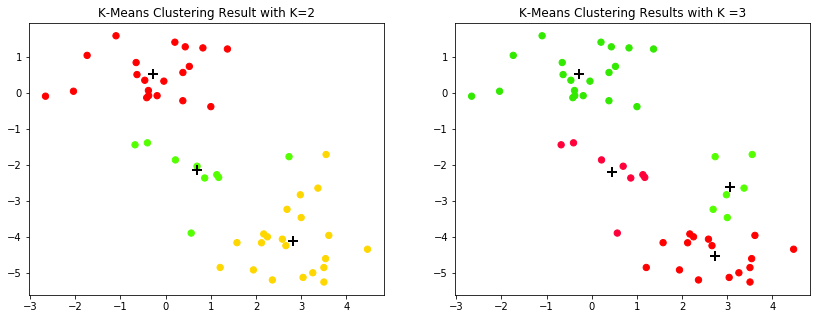

In [22]:
#fig is used to define
fig , (ax1, ax2) = plt.subplots(1,2,figsize=(14,5))

ax1.scatter(X[:,0], X[:,1] , s=40 , c = km1.labels_,cmap = plt.cm.prism)
ax1.set_title('K-Means Clustering Result with K=2')
ax1.scatter(km1.cluster_centers_[:,0],km1.cluster_centers_[:,1], marker='+',s=100,c='k',linewidth=2)

ax2.scatter(X[:,0],X[:,1],s=40 , c = km2.labels_,cmap = plt.cm.prism)
ax2.set_title('K-Means Clustering Results with K =3')

ax2.scatter(km2.cluster_centers_[:,0], km2.cluster_centers_[:,1],marker='+',s=100, c='k',linewidth=2)

Distortion : 99.31


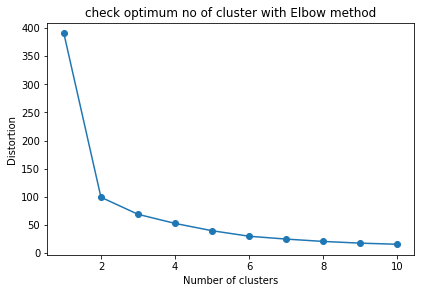

In [19]:
print('Distortion : %.2f' % km1.inertia_)

distortion = []
for i in range(1,11):
    km= KMeans(n_clusters=i,
               init= 'k-means++',
              n_init =10,
              max_iter=300,
              random_state = 0)
    km.fit(X)
    distortion.append(km.inertia_)
plt.plot(range(1,11), distortion , marker ='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.tight_layout()

#plt.savefig('images/11_')
plt.title('check optimum no of cluster with Elbow method')
plt.show()